# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

#### I generally check the shape, .info() and .describe() first

In [7]:
heroes_df.shape

(734, 10)

In [8]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [9]:
# .T just transposes a dataframe (switches the axes)
# -99 doesn't make sense for the height and weight, so it looks like we have some missing values listed as -99

heroes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,734.0,102.254087,139.624543,-99.0,-99.0,175.0,185.0,975.0
Weight,732.0,43.855191,130.823733,-99.0,-99.0,62.0,90.0,900.0


In [10]:
# Check null values per column

heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [11]:
heroes_df.isna().sum().sum()

17

In [12]:
powers_df.shape

(667, 168)

In [13]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [14]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [15]:
powers_df.isna().sum().sum()

0

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




#### We have a few type of missing values here. Actual np.nan null values, impossible values that are consistent (-99), and the '-' character. We have to deal with all of these in some way as we examine our data and to prepare it for modeling

In [16]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [17]:
# In the case where a very large percentage of values in a column is missing, you can generally safely drop the column
# It won't provide any usable data in this case
# Generally you want to do as much research as possible on why and how the data is missing

heroes_df['Skin color'].value_counts().head()

-        662
green     21
red        9
blue       9
white      7
Name: Skin color, dtype: int64

In [18]:
# the 'normalize = True' argument will show you the percentage of rows that have each value in a column

heroes_df['Skin color'].value_counts(normalize = True).head()

-        0.901907
green    0.028610
red      0.012262
blue     0.012262
white    0.009537
Name: Skin color, dtype: float64

In [19]:
# drop 'Skin color' column

heroes_df = heroes_df.drop(columns = 'Skin color')

In [20]:
# We can decide column by column what to keep in this dataset if we want. We don't have particular goals right now
# for this dataset, so it is hard to determine what data is important.

heroes_df['Race'].value_counts(normalize = True).head()

-                0.414169
Human            0.283379
Mutant           0.085831
God / Eternal    0.019074
Cyborg           0.014986
Name: Race, dtype: float64

In [21]:
# Unclear if the '-' is also no hair, or just left blank


heroes_df['Hair color'].value_counts(normalize = True).head()

-          0.234332
Black      0.215259
Blond      0.134877
Brown      0.117166
No Hair    0.102180
Name: Hair color, dtype: float64

In [22]:
# Zoom and Wondra are both characters in suits whose hair doesn't show. If you wanted you could easily research
# this info further. Sometimes missing data can be easily found, sometimes not.

heroes_df.tail(15)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
719,Wolverine,Male,blue,Mutant,Black,160.0,Marvel Comics,good,135.0
720,Wonder Girl,Female,blue,Demi-God,Blond,165.0,DC Comics,good,51.0
721,Wonder Man,Male,red,-,Black,188.0,Marvel Comics,good,171.0
722,Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,good,74.0
723,Wondra,Female,-,-,-,-99.0,Marvel Comics,good,-99.0
724,Wyatt Wingfoot,Male,brown,-,Black,196.0,Marvel Comics,good,117.0
725,X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,good,50.0
726,X-Man,Male,blue,-,Brown,175.0,Marvel Comics,good,61.0
727,Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,bad,95.0
728,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,good,83.0


In [23]:
heroes_df.shape

(734, 9)

In [24]:
# Since we have fewer unique name values than the length of our dataset, we must have duplicate superhores in our data

heroes_df.nunique()

name          715
Gender          3
Eye color      23
Race           62
Hair color     30
Height         54
Publisher      24
Alignment       4
Weight        135
dtype: int64

In [25]:
# Let's check out all of our duplicates by 'name' column

heroes_df[heroes_df['name'].duplicated(keep = False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,good,77.0


In [26]:
# we can also see all our duplicates across all columns - only Goliath appears to be fully duplicated

heroes_df[heroes_df.duplicated(keep = False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,good,-99.0


In [27]:
# In this case we'll just keep all of our first appearance of duplicate names, and drop the rest. Normally, you will 
# want to come up with good reasoning for what you do with duplicates when working on a dataset. The '~' is a bitwise
# operator that will switch 0 to 1 and 1 to 0. We will use that on our mask here.

heroes_df = heroes_df[~heroes_df['name'].duplicated(keep = 'first')]

In [28]:
# Our weight and height columns both have -99 in place of height and weight. For the sake of demonstration, I'll
# show a couple ways to impute a median value here. Please be careful doing this. You are just making up data, and
# also artificially decreasing your standard deviation. This reduces p-values and can give false confidence in models.

heroes_df['Weight'] = heroes_df['Weight'].apply(lambda x: np.mean(heroes_df['Weight']) if x == -99 else x)


In [29]:
# A better way on the weight column - always use built-in functions if possible. 
# They are faster than using apply or applymap with your own function

heroes_df['Height'].replace(-99, np.median(heroes_df['Height']), inplace= True)

In [30]:
heroes_df['Weight'].value_counts().head()

44.809257    229
54.000000     23
79.000000     23
81.000000     22
90.000000     19
Name: Weight, dtype: int64

#### Quick demo on how to find if a specific word is in a column name, or a column with some slight manipulation

In [31]:
trial_str = 'Reality warping'

In [32]:
trial_str.split()

['Reality', 'warping']

In [33]:
'Reality' in trial_str

True

In [34]:
'Reality' in list(powers_df.columns)

False

In [35]:
# Here is the actual code to find a column name that contains the word 'Reality'

pd.Series(powers_df.columns)[pd.Series(powers_df.columns).apply(lambda x: x if 'Reality' in x  else 0 ) != 0]

159    Reality Warping
dtype: object

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [36]:
# I set the name column as the index in both tables and merged on that. There are other (easier) ways to do this.
# Check out the pandas documentation on merge, join, and concat

In [37]:
heroes_df.set_index('name', drop = True, inplace = True)

In [38]:
powers_df.rename(columns = {'hero_names' : 'name'}, inplace = True)

In [39]:
powers_df.set_index('name', inplace = True)

In [40]:
combined_df = pd.merge(heroes_df, powers_df, how = 'inner', left_index = True, right_index = True)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [41]:
male_df = combined_df[combined_df['Gender'] == 'Male']

In [42]:
female_df = combined_df[combined_df['Gender'] == 'Female']

In [43]:
male_df['Gender'].value_counts(), female_df['Gender'].value_counts()

(Male    452
 Name: Gender, dtype: int64, Female    174
 Name: Gender, dtype: int64)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [44]:
male_heroes_df = combined_df[combined_df['Gender'] == 'Male']
female_heroes_df = combined_df[combined_df['Gender'] == 'Female']

def show_distplot(dataframe, column_name):
    return(sns.distplot(dataframe[column_name]))

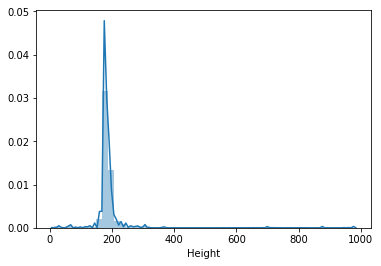

In [45]:
# Male Height
show_distplot(male_heroes_df, 'Height');

ValueError: cannot convert float NaN to integer

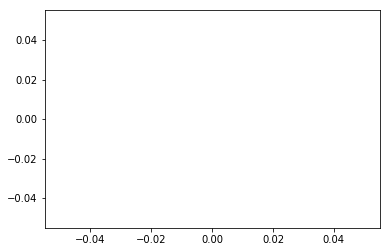

In [46]:
show_distplot(male_heroes_df, 'Weight');

# Oops we forgot to fix the actual np.nan values! So we get an error trying to plot. 
# We could replace them with the median. In this case, for simplicity, I'll just drop the rows.

In [47]:
male_heroes_df.dropna(inplace = True)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


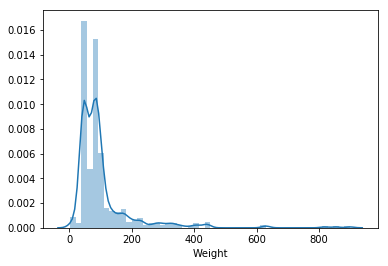

In [48]:
# Male Weight - we have a weird bimodal distribution where we imputed data!

show_distplot(male_heroes_df, 'Weight');

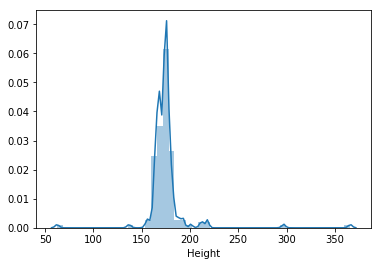

In [50]:
# Female Height
show_distplot(female_heroes_df, 'Height');

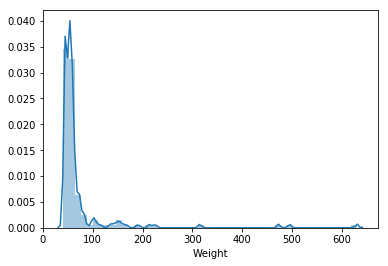

In [51]:
# Female Weight
show_distplot(female_heroes_df, 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [59]:
combined_df.loc[:, 'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head()

Super Strength    350
Stamina           281
Durability        251
Super Speed       241
Agility           235
dtype: int64

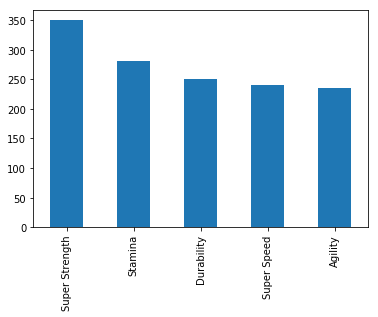

In [61]:
combined_df.loc[:, 'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head().plot(kind = 'bar');

In [69]:
# groupby lets you group rows together based on column value. After that, you need to use an aggregation function
# like .sum() or .count(). Play around with this code. Break it up and see what's going on!

combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False)[2:7]

Super Strength    103.0
Flight             83.0
Stamina            83.0
Super Speed        75.0
Agility            68.0
Name: DC Comics, dtype: float64

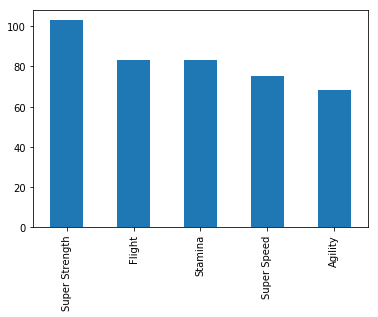

In [70]:
combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False)[2:7].plot(kind='bar')

In [71]:
combined_df.groupby('Publisher').sum().loc['Marvel Comics'].sort_values(ascending = False)[2:7]

Super Strength    199.0
Durability        148.0
Stamina           145.0
Super Speed       132.0
Agility           121.0
Name: Marvel Comics, dtype: float64

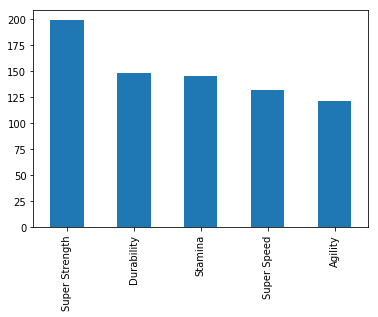

In [72]:
combined_df.groupby('Publisher').sum().loc['Marvel Comics'].sort_values(ascending = False)[2:7].plot(kind = 'bar')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data